## 1. Asset and Liability Trend


Year-wise change in total assets and total liabilities.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Cleaned_Company_Data\Automobiles\ASHOKLEY_balance_sheet.csv")

df.rename(columns={'Financial Metric':'Year'}, inplace=True)
df = df.T
df.reset_index(inplace=True)
 # Make sure columns are clean
 
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Set the first row as column headers
df.columns = df.iloc[0]    # first row as header
df = df[1:]                # remove the first row from data
df = df.reset_index(drop=True)  # reset the index

# Extract only year from 'Year' column
df['Year'] = df['Year'].apply(lambda x: str(x).split()[-1])  # take the last part after splitting by space

df.tail()

,Year,Equity Capital,Reserves,Borrowings,Other Liabilities,Total Liabilities,Fixed Assets,CWIP,Investments,Other Assets,Total Assets
7,2021,294,7568,24077,10119,42058,8484,336,1096,32143,42058
8,2022,294,7010,24145,12125,43574,7895,240,2652,32787,43574
9,2023,294,8258,31161,14984,54697,8146,268,4852,41430,54697
10,2024,294,8711,40802,17788,67595,8157,415,2329,56695,67595
11,2024,294,10018,44298,15991,70600,8589,219,3953,57839,70600


In [49]:
print(df[['Year', 'Total Assets', 'Total Liabilities']].head())
print(df.columns.tolist())

0  Year Total Assets Total Liabilities
0  2014        17524             17524
1  2015        19592             19592
2  2016        22123             22123
3  2017        26609             26609
4  2018        33383             33383
['Year', 'Equity Capital', 'Reserves', 'Borrowings', 'Other Liabilities', 'Total Liabilities', 'Fixed Assets', 'CWIP', 'Investments', 'Other Assets', 'Total Assets']


In [50]:
print((df['Total Assets'] == df['Total Liabilities']).all())
## Total Assests and liabilities are same

True


In [51]:
# Ensure numeric types
df['Total Assets'] = pd.to_numeric(df['Total Assets'], errors='coerce')
df['Total Liabilities'] = pd.to_numeric(df['Total Liabilities'], errors='coerce')

#Compute changes and ratios
df['Total_Assets_Change'] = df['Total Assets'].diff()
df['Total_Liabilities_Change'] = df['Total Liabilities'].diff()
df['Total_Assets_Pct_Change'] = df['Total Assets'].pct_change() * 100
df['Total_Liabilities_Pct_Change'] = df['Total Liabilities'].pct_change() * 100  # ✅ ADDED THIS LINE



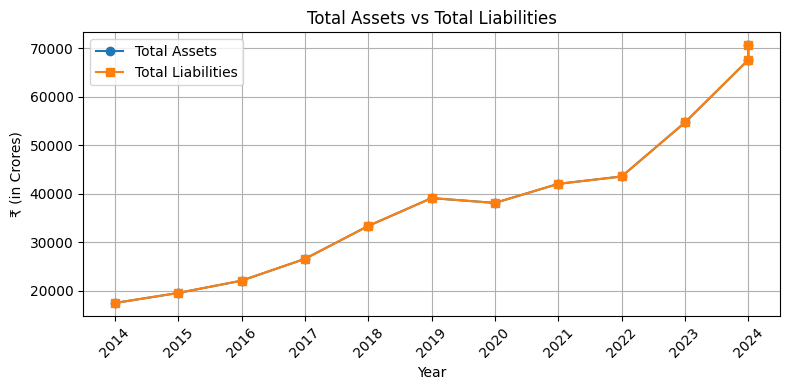

In [52]:
# Plot with reduced size
plt.figure(figsize=(8, 4))  # Reduced from (12, 6)
plt.plot(df['Year'], df['Total Assets'], label='Total Assets', marker='o')
plt.plot(df['Year'], df['Total Liabilities'], label='Total Liabilities', marker='s')
plt.title('Total Assets vs Total Liabilities')
plt.xlabel('Year')
plt.ylabel('₹ (in Crores)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Compare current vs. non-current assets/liabilities.


In [53]:
# Define Current and Non-Current Assets/Liabilities
df['Current_Liabilities'] = pd.to_numeric(df['Other Liabilities'], errors='coerce')
df['NonCurrent_Liabilities'] = pd.to_numeric(df['Borrowings'], errors='coerce')
df['Current_Assets'] = pd.to_numeric(df['Other Assets'], errors='coerce')
df['NonCurrent_Assets'] = pd.to_numeric(df['Fixed Assets'], errors='coerce') + \
                          pd.to_numeric(df['CWIP'], errors='coerce') + \
                          pd.to_numeric(df['Investments'], errors='coerce')

# Compute Ratios
df['Current_Assets_Ratio'] = df['Current_Assets'] / df['Total Assets']
df['NonCurrent_Assets_Ratio'] = df['NonCurrent_Assets'] / df['Total Assets']
df['Current_Liabilities_Ratio'] = df['Current_Liabilities'] / df['Total Liabilities']
df['NonCurrent_Liabilities_Ratio'] = df['NonCurrent_Liabilities'] / df['Total Liabilities']


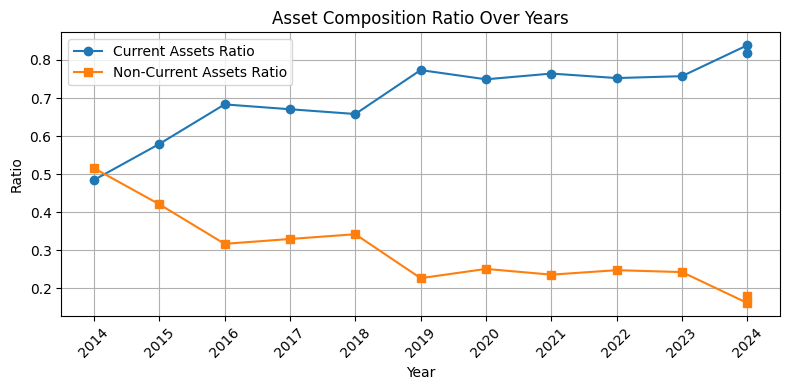

In [54]:
# Plot: Asset Composition Ratios
plt.figure(figsize=(8, 4))  # Reduced from (12, 6)
plt.plot(df['Year'], df['Current_Assets_Ratio'], label='Current Assets Ratio', marker='o')
plt.plot(df['Year'], df['NonCurrent_Assets_Ratio'], label='Non-Current Assets Ratio', marker='s')
plt.title('Asset Composition Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


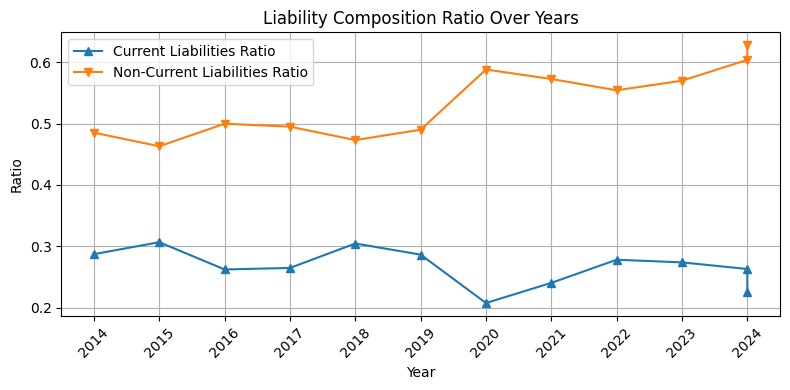

In [55]:
# Plot: Liability Composition Ratios
plt.figure(figsize=(8, 4))  # Reduced from (12, 6)
plt.plot(df['Year'], df['Current_Liabilities_Ratio'], label='Current Liabilities Ratio', marker='^')
plt.plot(df['Year'], df['NonCurrent_Liabilities_Ratio'], label='Non-Current Liabilities Ratio', marker='v')
plt.title('Liability Composition Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Equity and Debt Analysis


Track share capital and reserves.





In [56]:
print(df.columns)


Index(['Year', 'Equity Capital', 'Reserves', 'Borrowings', 'Other Liabilities',
       'Total Liabilities', 'Fixed Assets', 'CWIP', 'Investments',
       'Other Assets', 'Total Assets', 'Total_Assets_Change',
       'Total_Liabilities_Change', 'Total_Assets_Pct_Change',
       'Total_Liabilities_Pct_Change', 'Current_Liabilities',
       'NonCurrent_Liabilities', 'Current_Assets', 'NonCurrent_Assets',
       'Current_Assets_Ratio', 'NonCurrent_Assets_Ratio',
       'Current_Liabilities_Ratio', 'NonCurrent_Liabilities_Ratio'],
      dtype='object', name=0)


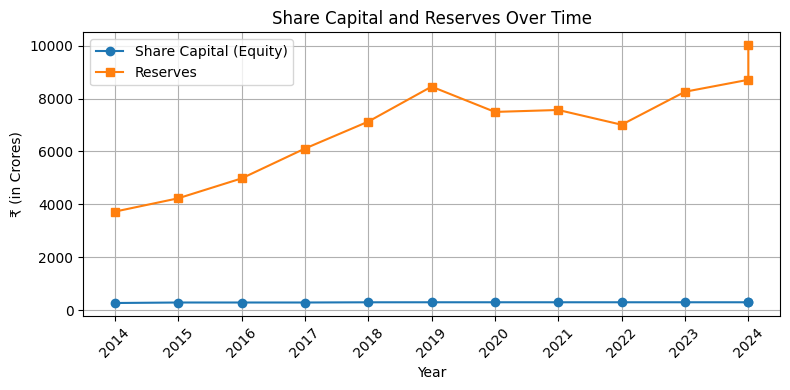

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Equity Capital'], label='Share Capital (Equity)', marker='o')
plt.plot(df['Year'], df['Reserves'], label='Reserves', marker='s')
plt.title('Share Capital and Reserves Over Time')
plt.xlabel('Year')
plt.ylabel('₹ (in Crores)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Calculate Change and Growth Rate in Share Capital and Reserves

In [58]:
df['Share_Capital_Change'] = df['Equity Capital'].diff()
df['Reserves_Change'] = df['Reserves'].diff()

df['Share_Capital_Growth_%'] = df['Equity Capital'].pct_change() * 100
df['Reserves_Growth_%'] = df['Reserves'].pct_change() * 100


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2544\938139738.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Share_Capital_Growth_%'] = df['Equity Capital'].pct_change() * 100
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2544\938139738.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Reserves_Growth_%'] = df['Reserves'].pct_change() * 100


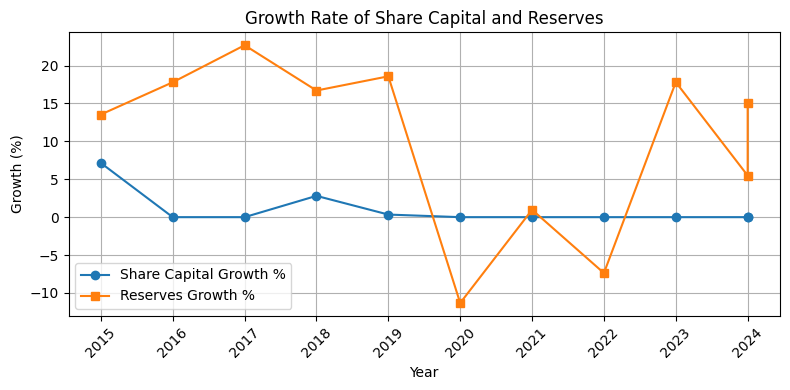

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Share_Capital_Growth_%'], label='Share Capital Growth %', marker='o')
plt.plot(df['Year'], df['Reserves_Growth_%'], label='Reserves Growth %', marker='s')
plt.title('Growth Rate of Share Capital and Reserves')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analyze long-term vs. short-term borrowings.

In financial data:

Long-term borrowings (non-current liabilities): Debts due after 12 months, such as bonds, term loans.

Short-term borrowings (current liabilities): Debts due within 12 months, often included under "Other Liabilities" or explicitly labeled.

In [60]:
# Ensure numeric types
df['Borrowings'] = pd.to_numeric(df['Borrowings'], errors='coerce')
df['Other Liabilities'] = pd.to_numeric(df['Other Liabilities'], errors='coerce')

# Assign
df['Short_Term_Borrowings'] = df['Other Liabilities']
df['Long_Term_Borrowings'] = df['Borrowings']


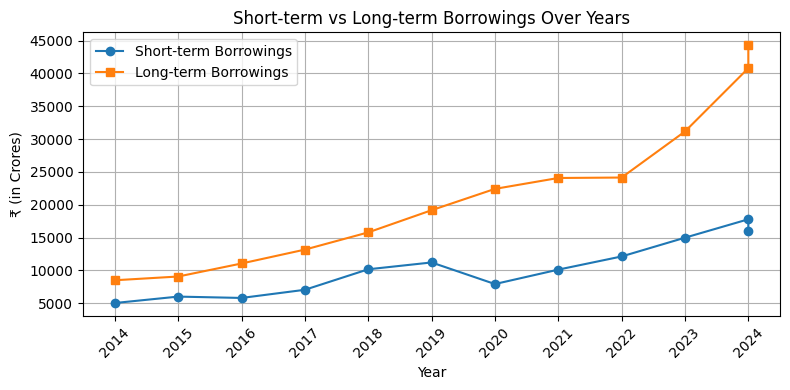

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Short_Term_Borrowings'], label='Short-term Borrowings', marker='o')
plt.plot(df['Year'], df['Long_Term_Borrowings'], label='Long-term Borrowings', marker='s')
plt.title('Short-term vs Long-term Borrowings Over Years')
plt.xlabel('Year')
plt.ylabel('₹ (in Crores)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Leverage Ratios


Debt/Equity Ratio = Total Debt / Shareholder’s Equity.


Debt/Equity Ratio evaluates a company's financial leverage by comparing its total debt to shareholders' equity:


In [62]:
df['Borrowings'] = pd.to_numeric(df['Borrowings'], errors='coerce')  # Total debt
df['Equity Capital'] = pd.to_numeric(df['Equity Capital'], errors='coerce')
df['Reserves'] = pd.to_numeric(df['Reserves'], errors='coerce')


In [63]:
#Compute Shareholder’s Equity and Debt_Equity_Ratio
df['Shareholders_Equity'] = df['Equity Capital'] + df['Reserves']
df['Debt_Equity_Ratio'] = df['Borrowings'] / df['Shareholders_Equity']


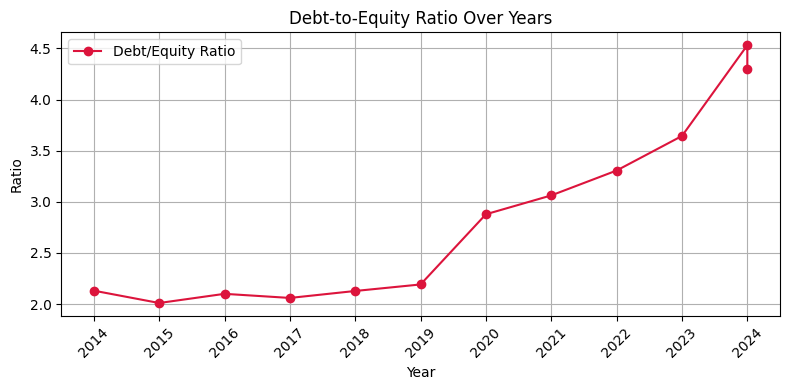

In [64]:
# Debt/Equity Ratio	Meaning
# < 1	Low leverage: conservative capital structure
# ≈ 1	Balanced debt and equity
# > 2	High leverage: riskier for creditors
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Debt_Equity_Ratio'], label='Debt/Equity Ratio', marker='o', color='crimson')
plt.title('Debt-to-Equity Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Interest Coverage Ratio (if interest expense is available).




In [ ]:
import pandas as pd

# Load the Profit & Loss CSV
pl_df = pd.read_csv(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Cleaned_Company_Data\Automobiles\ASHOKLEY_profit_&_loss.csv")

# Transpose the dataframe so years become rows
pl_df = pl_df.T

# Reset index to turn the index into a column
pl_df.reset_index(inplace=True)

# Clean column names (remove spaces)
pl_df.columns = pl_df.columns.str.strip()

# Set the first row as header
pl_df.columns = pl_df.iloc[0]
pl_df = pl_df[1:]

# Reset index after dropping header row
pl_df = pl_df.reset_index(drop=True)

# Rename the first column from 'Financial Metric' to 'Year'
pl_df.rename(columns={'Financial Metric': 'Year'}, inplace=True)

# Extract only year from 'Year' column (e.g., "Mar 2014" → "2014")
pl_df['Year'] = pl_df['Year'].apply(lambda x: str(x).split()[-1])

# Display tail to verify
pl_df.head()

# Select only Year and Sales from P&L dataframe
pl_ICR = pl_df[['Year', 'Operating Profit','Interest']]

# Make sure 'Sales' is numeric
pl_ICR['Operating Profit'] = pd.to_numeric(pl_ICR['Operating Profit'], errors='coerce')
pl_ICR['Interest'] = pd.to_numeric(pl_ICR['Interest'], errors='coerce')

# Merge with balance sheet dataframe on 'Year'
merged_df_ICR= pd.merge(df, pl_ICR, on='Year', how='left')

merged_df_ICR.head()


In [74]:
df['Operating Profit'] = pd.to_numeric(merged_df_ICR['Operating Profit'], errors='coerce')
df['Interest'] = pd.to_numeric(merged_df_ICR['Interest'], errors='coerce')

df['Interest_Coverage_Ratio'] = merged_df_ICR['Operating Profit'] / df['Interest']


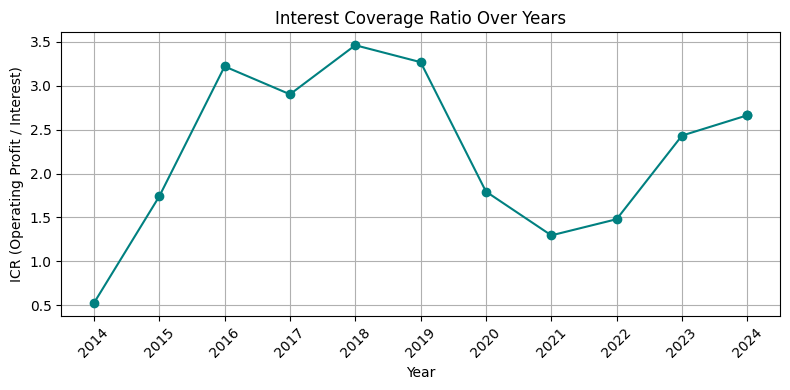

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Interest_Coverage_Ratio'], marker='o', linestyle='-', color='teal')
plt.title('Interest Coverage Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('ICR (Operating Profit / Interest)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Efficiency Metrics


Asset Turnover Ratio = Revenue / Total Assets.







In [ ]:
import pandas as pd

# Load the Profit & Loss CSV
pl_df = pd.read_csv(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Cleaned_Company_Data\Automobiles\ASHOKLEY_profit_&_loss.csv")

# Transpose the dataframe so years become rows
pl_df = pl_df.T

# Reset index to turn the index into a column
pl_df.reset_index(inplace=True)

# Clean column names (remove spaces)
pl_df.columns = pl_df.columns.str.strip()

# Set the first row as header
pl_df.columns = pl_df.iloc[0]
pl_df = pl_df[1:]

# Reset index after dropping header row
pl_df = pl_df.reset_index(drop=True)

# Rename the first column from 'Financial Metric' to 'Year'
pl_df.rename(columns={'Financial Metric': 'Year'}, inplace=True)

# Extract only year from 'Year' column (e.g., "Mar 2014" → "2014")
pl_df['Year'] = pl_df['Year'].apply(lambda x: str(x).split()[-1])

# Display tail to verify
pl_df.head()

# Select only Year and Sales from P&L dataframe
pl_sales = pl_df[['Year', 'Sales']]

# Make sure 'Sales' is numeric
pl_sales['Sales'] = pd.to_numeric(pl_sales['Sales'], errors='coerce')

# Merge with balance sheet dataframe on 'Year'
merged_df = pd.merge(df, pl_sales, on='Year', how='left')

merged_df.head()



In [68]:
df['Avg_Total_Assets'] = (df['Total Assets'] + df['Total Assets'].shift(1)) / 2

df['Asset_Turnover_Ratio'] = merged_df['Sales'] / df['Avg_Total_Assets']


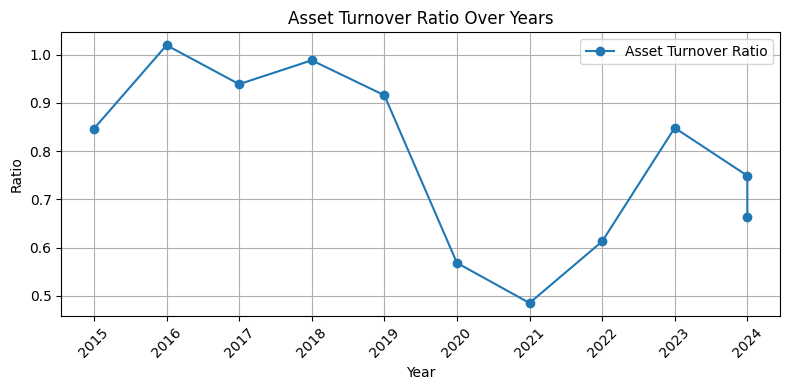

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Asset_Turnover_Ratio'], marker='o', label='Asset Turnover Ratio')
plt.title('Asset Turnover Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Capital Employed = Total Assets - Current Liabilities.

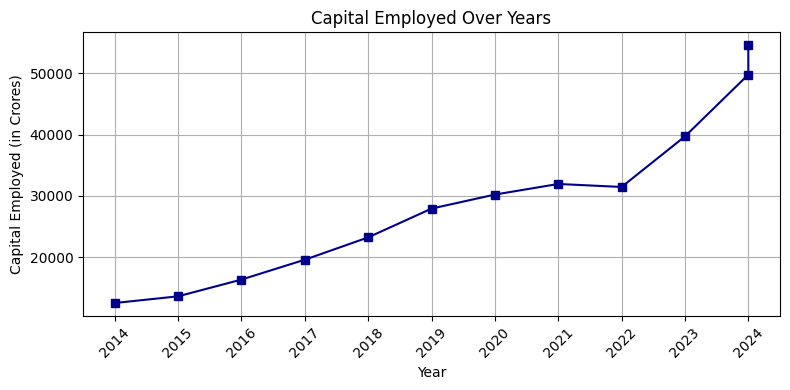

In [80]:
df['Capital_Employed'] = df['Total Assets'] - df['Current_Liabilities']
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Capital_Employed'], marker='s', linestyle='-', color='darkblue')
plt.title('Capital Employed Over Years')
plt.xlabel('Year')
plt.ylabel('Capital Employed (in Crores)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 5. Visualization


Multi-line chart for Assets vs. Liabilities vs. Equity.


In [94]:
print(df[['Year', 'Total Assets', 'Total Liabilities', 'Shareholders_Equity']].head())
# total Assets and Total Liabilities have same values

0  Year  Total Assets  Total Liabilities  Shareholders_Equity
0  2014         17524              17524                 3989
1  2015         19592              19592                 4512
2  2016         22123              22123                 5264
3  2017         26609              26609                 6393
4  2018         33383              33383                 7421


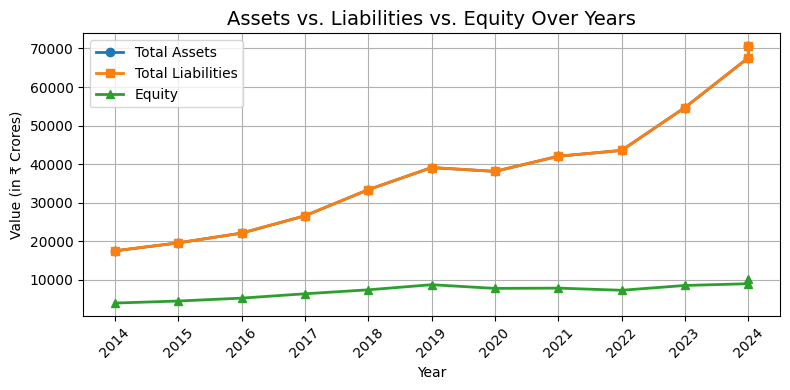

In [95]:
import matplotlib.pyplot as plt

# Convert year to string if needed
df['Year'] = df['Year'].astype(str)

# Ensure numeric conversion for plotting
df['Total Assets'] = pd.to_numeric(df['Total Assets'], errors='coerce')
df['Total Liabilities'] = pd.to_numeric(df['Total Liabilities'], errors='coerce')
df['Shareholders_Equity'] = pd.to_numeric(df['Shareholders_Equity'], errors='coerce')

# Plot
plt.figure(figsize=(8, 4))
plt.plot(df['Year'], df['Total Assets'], marker='o', label='Total Assets', linewidth=2)
plt.plot(df['Year'], df['Total Liabilities'], marker='s', label='Total Liabilities', linewidth=2)
plt.plot(df['Year'], df['Shareholders_Equity'], marker='^', label='Equity', linewidth=2)

# Aesthetics
plt.title('Assets vs. Liabilities vs. Equity Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value (in ₹ Crores)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Column chart for Debt-Equity Ratio per company per year.




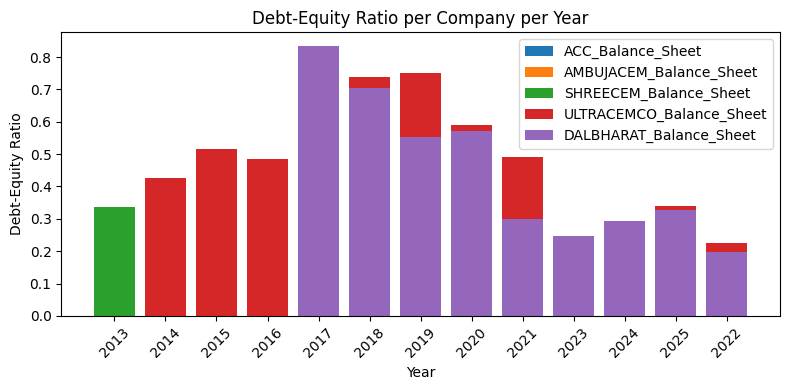

In [105]:
df_allcompany=pd.read_excel(r"C:\Users\ASUS\Desktop\College_Last_sem_pro\git\Riskify\Data\processed\Combined_Balance_With_Average_Median_Yearwise.xlsx")
df_allcompany=df_allcompany.iloc[:50]  # Keep only the first 51 rows

# Step 1: Filter rows for required metrics
borrowings =df_allcompany[df_allcompany['Financial_Metric'] == 'Borrowings']
equity_cap = df_allcompany[df_allcompany['Financial_Metric'] == 'Equity Capital']
reserves = df_allcompany[df_allcompany['Financial_Metric'] == 'Reserves']

# Step 2: Melt each to long format for easier merge
def melt_df(metric_df, value_name):
    return pd.melt(
        metric_df,
        id_vars=['Company'],
        value_vars=[str(year) for year in range(2013, 2026)],
        var_name='Year',
        value_name=value_name
    )

borrowings_melted = melt_df(borrowings, 'Borrowings')
equity_melted = melt_df(equity_cap, 'Equity_Capital')
reserves_melted = melt_df(reserves, 'Reserves')

# Step 3: Merge all
merged_df = borrowings_melted.merge(equity_melted, on=['Company', 'Year'])
merged_df = merged_df.merge(reserves_melted, on=['Company', 'Year'])

# Step 4: Calculate Debt-Equity Ratio
merged_df['Equity_Total'] = merged_df['Equity_Capital'] + merged_df['Reserves']
merged_df['Debt_Equity_Ratio'] = merged_df['Borrowings'] / merged_df['Equity_Total']

# Drop rows with NaN values
merged_df.dropna(subset=['Debt_Equity_Ratio'], inplace=True)

# Step 5: Plot Column Chart (Bar Chart)
plt.figure(figsize=(8, 4))
for company in merged_df['Company'].unique():
    company_data = merged_df[merged_df['Company'] == company]
    plt.bar(company_data['Year'], company_data['Debt_Equity_Ratio'], label=company)

plt.xlabel('Year')
plt.ylabel('Debt-Equity Ratio')
plt.title('Debt-Equity Ratio per Company per Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()